In [1]:
import sys; sys.path.append('..')
from filehashcache.etc.performance import *

In [5]:
c=Cache()

In [6]:
c['x']=1

In [11]:
x='1'
import hashlib
hashlib.md5(x.encode()).hexdigest()

'c4ca4238a0b923820dcc509a6f75849b'

In [9]:
!ls {c.root_dir}/*/*

e461268c8034f5c8564e155c67a6


In [2]:
PROFILE_SIZES

[1024, 2048, 4096, 8192, 16384]

In [3]:
df = FileHashCacheProfiler.profile(
    size=PROFILE_SIZES, 
    iterations=100
)
df

1
3
5
7


Size (KB)  Write Speed (MB/s)  \
Engine Encoding Method                                             
memory raw      memory (raw)             6.2              111.65   
       b64      memory (b64)             6.2               95.90   
       zlib     memory (zlib)            6.2               36.95   
       zlib+b64 memory (zlib+b64)        6.2               33.98   
file   raw      file (raw)               6.2               27.35   
       b64      file (b64)               6.2               26.44   
       zlib     file (zlib)              6.2               16.48   
       zlib+b64 file (zlib+b64)          6.2               15.50   
shelve raw      shelve (raw)             6.2               11.00   
       b64      shelve (b64)             6.2               10.38   
       zlib     shelve (zlib)            6.2                8.27   
       zlib+b64 shelve (zlib+b64)        6.2                8.07   
sqlite raw      sqlite (raw)             6.2                4.27   
       b64      sqlite (b64)             6.2                4.06   
       zlib     sqlite (zlib)            6.2                3.66   
       zlib+b64 sqlite (zlib+b64)        6.2                3.49   

                                   Read Speed (MB/s)  Space Saved (MB/GB)  \
Engine Encoding Method                                                      
memory raw      memory (raw)                  164.78                 0.00   
       b64      memory (b64)                  125.39              -341.86   
       zlib     memory (zlib)                 103.78               425.78   
       zlib+b64 memory (zlib+b64)              88.09               225.97   
file   raw      file (raw)                     70.61                 0.00   
       b64      file (b64)                     61.36              -341.87   
       zlib     file (zlib)                    55.88               425.84   
       zlib+b64 file (zlib+b64)                49.79               225.86   
shelve raw      shelve (raw)                   22.84                 0.00   
       b64      shelve (b64)                   20.78              -341.87   
       zlib     shelve (zlib)                  20.09               425.77   
       zlib+b64 shelve (zlib+b64)              19.26               225.90   
sqlite raw      sqlite (raw)                    9.36                 0.00   
       b64      sqlite (b64)                    8.73              -341.87   
       zlib     sqlite (zlib)                   8.67               425.77   
       zlib+b64 sqlite (zlib+b64)               8.14               225.79   

                                   Write Time (s)  Read Time (s)  \
Engine Encoding Method                                             
memory raw      memory (raw)                 0.00            0.0   
       b64      memory (b64)                 0.00            0.0   
       zlib     memory (zlib)                0.00            0.0   
       zlib+b64 memory (zlib+b64)            0.00            0.0   
file   raw      file (raw)                   0.00            0.0   
       b64      file (b64)                   0.00            0.0   
       zlib     file (zlib)                  0.00            0.0   
       zlib+b64 file (zlib+b64)              0.00            0.0   
shelve raw      shelve (raw)                 0.00            0.0   
       b64      shelve (b64)                 0.00            0.0   
       zlib     shelve (zlib)                0.01            0.0   
       zlib+b64 shelve (zlib+b64)            0.01            0.0   
sqlite raw      sqlite (raw)                 0.00            0.0   
       b64      sqlite (b64)                 0.00            0.0   
       zlib     sqlite (zlib)                0.00            0.0   
       zlib+b64 sqlite (zlib+b64)            0.00            0.0   

                                   Raw Size (MB)  Cached Size (MB)  \
Engine Encoding Method                                               
memory raw      memory (raw)                0.01          

In [7]:
1024* 2 * 2


4096

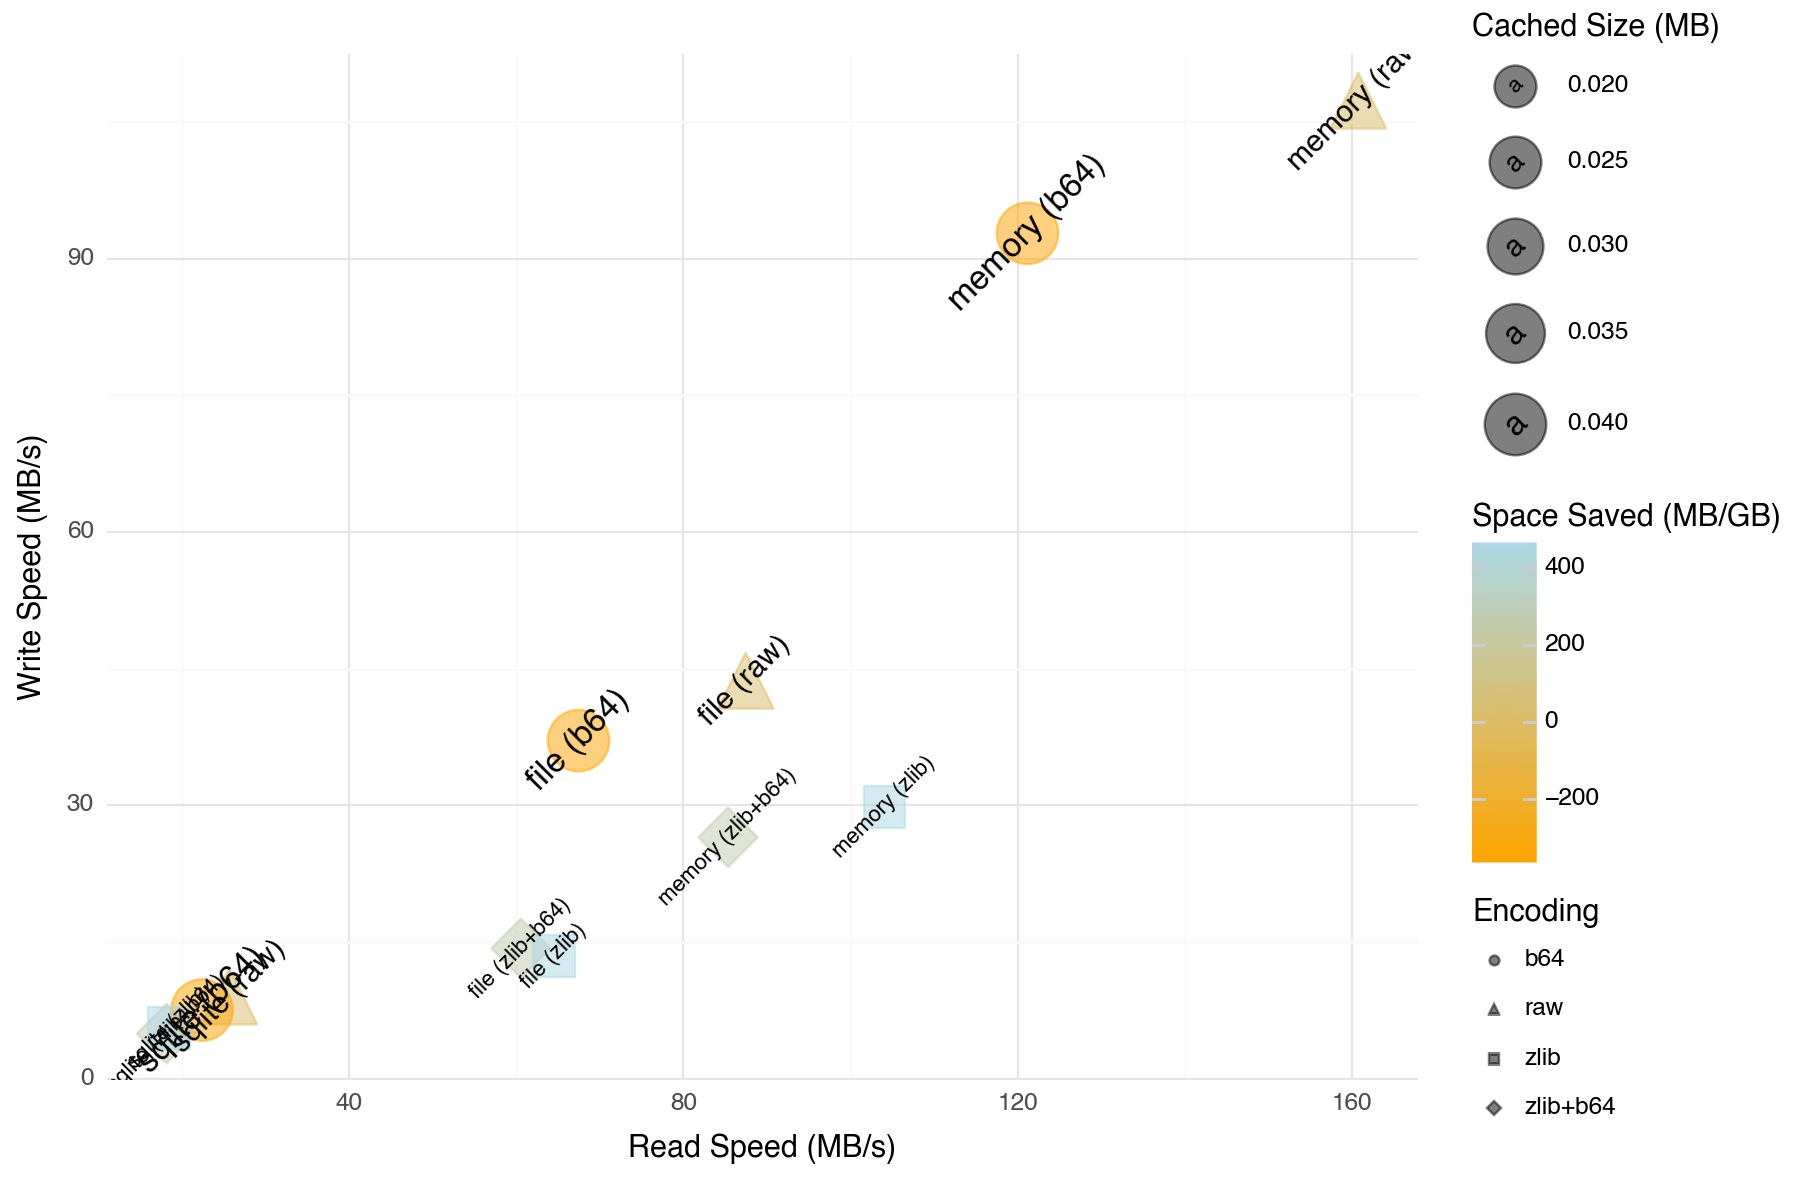

<Figure Size: (900 x 600)>

In [23]:
# !pip install plotnine
import plotnine as p9
p9.options.figure_size=9,6
figdf = df.reset_index()
fig = p9.ggplot(figdf, p9.aes(x='Read Speed (MB/s)', y='Write Speed (MB/s)', label='Method', color='Space Saved (MB/GB)',size='Cached Size (MB)',shape='Encoding'))
fig += p9.geom_point(alpha=.5)
fig += p9.geom_text(color='black',angle=45)
fig += p9.theme_minimal()
# fig += p9.scale_x_log10()
# fig += p9.scale_y_log10()
fig += p9.scale_size_continuous(range=(8, 12))
fig += p9.scale_color_gradient(low='orange', high='lightblue')
fig